# Feature Scaling and Normalization

**Purpose**: different feature magnitude will affect the performance of the model  
**Approach**: There are two traditional ways
1. Min-max scaling
2. Standard normal distribution scaling (Z-score scaling)

### Min-Max scaling

Consider a set of real values $\{x^{(1)}, x^{(2)}, \dots, x^{(n)}\}$ 

We use the following equation for Min-Max scaling
\begin{equation} \bar{x}^{(i)} = \frac{x^{(i)} - X_{min}}{X_{max}-X_{min}} \end{equation}

to scale all $x$ values to a range between 0 and 1, where 
\begin{align}
X_{min} =& \min\{x^{(1)}, x^{(2)}, \dots, x^{(n)}\}\\
X_{max} =&\max\{x^{(1)}, x^{(2)}, \dots, x^{(n)}\}\\
\end{align}


**Example 1:** <font color=cyan>1D Case with Min-Max scaling</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
X = np.random.rand(100)*100

In [3]:
X

array([4.17022005e+01, 7.20324493e+01, 1.14374817e-02, 3.02332573e+01,
       1.46755891e+01, 9.23385948e+00, 1.86260211e+01, 3.45560727e+01,
       3.96767474e+01, 5.38816734e+01, 4.19194514e+01, 6.85219500e+01,
       2.04452250e+01, 8.78117436e+01, 2.73875932e+00, 6.70467510e+01,
       4.17304802e+01, 5.58689828e+01, 1.40386939e+01, 1.98101489e+01,
       8.00744569e+01, 9.68261576e+01, 3.13424178e+01, 6.92322616e+01,
       8.76389152e+01, 8.94606664e+01, 8.50442114e+00, 3.90547832e+00,
       1.69830420e+01, 8.78142503e+01, 9.83468338e+00, 4.21107625e+01,
       9.57889530e+01, 5.33165285e+01, 6.91877114e+01, 3.15515631e+01,
       6.86500928e+01, 8.34625672e+01, 1.82882773e+00, 7.50144315e+01,
       9.88861089e+01, 7.48165654e+01, 2.80443992e+01, 7.89279328e+01,
       1.03226007e+01, 4.47893526e+01, 9.08595503e+01, 2.93614148e+01,
       2.87775339e+01, 1.30028572e+01, 1.93669579e+00, 6.78835533e+01,
       2.11628116e+01, 2.65546659e+01, 4.91573159e+01, 5.33625451e+00,
      

In [4]:
def minmax_scaling(X):
    Xmin = X.min(axis=0) # axis=0: column direction (y-direction), axis=1: row direction (x-direction)
    Xmax = X.max(axis=0)
    return (X - Xmin)/(Xmax - Xmin)

In [5]:
X_norm = minmax_scaling(X)

In [6]:
X_norm

array([0.42165261, 0.72840709, 0.        , 0.30565785, 0.1483105 ,
       0.09327386, 0.18826443, 0.349378  , 0.40116755, 0.54483353,
       0.42384984, 0.69290256, 0.20666352, 0.88799593, 0.02758362,
       0.67798267, 0.42193862, 0.5649328 , 0.14186906, 0.20024048,
       0.80974246, 0.97916604, 0.3168757 , 0.70008651, 0.88624798,
       0.90467283, 0.08589645, 0.0393836 , 0.17164764, 0.88802129,
       0.09935048, 0.42578473, 0.96867594, 0.53911776, 0.69963594,
       0.31899095, 0.69419857, 0.84400917, 0.01838075, 0.7585663 ,
       1.        , 0.75656512, 0.28352015, 0.79814673, 0.10428518,
       0.45287549, 0.91882088, 0.2968402 , 0.29093494, 0.1313928 ,
       0.0194717 , 0.68644593, 0.21392106, 0.26845327, 0.49705226,
       0.05385421, 0.58053617, 0.14828287, 0.59589696, 0.70760689,
       0.10338346, 0.41865283, 0.7021877 , 0.41877752, 0.05040632,
       0.54187996, 0.67123386, 0.52063358, 0.95522986, 0.59311516,
       0.91356818, 0.13892368, 0.14074583, 0.81646483, 0.40208

**Example 2:** <font color=yellow>2D Case with Min-Max scaling</font>

In [7]:
X_2D = np.random.rand(100, 2)*100

In [63]:
X_2D[:5]

array([[32.66449018, 52.70581023],
       [88.59420993, 35.726976  ],
       [90.85351509, 62.33601158],
       [ 1.58212428, 92.94372337],
       [69.08969175, 99.73228505]])

In [9]:
X_2D_norm = minmax_scaling(X_2D)

In [64]:
X_2D_norm[:5]

array([[0.33208252, 0.52246084],
       [0.90139095, 0.35004608],
       [0.92438841, 0.62025252],
       [0.01569522, 0.93106428],
       [0.70285453, 1.        ]])

Use <font color=yellow>MinMaxScaler</font> in skelearn module

In [11]:
from sklearn import preprocessing
minmax_scaler = preprocessing.MinMaxScaler()
minmax_scaler.fit(X_2D)
# minmax_scaler will find the min and max values in the X_2D numpy array
X_2D_norm_sk = minmax_scaler.transform(X_2D) 
# X_2D_norm_sk : same as X_2D_norm but found using built in MinMaxScaler from sklearn

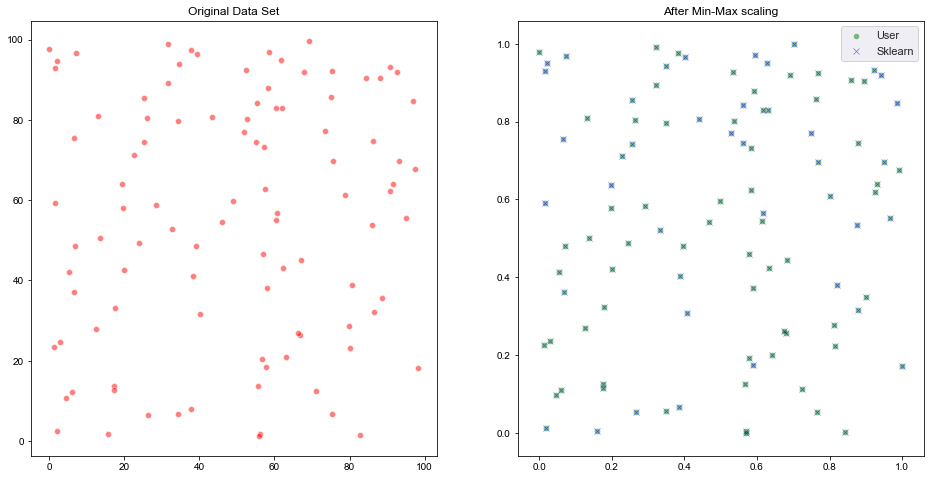

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 8))
sns.set()
sns.scatterplot(X_2D[:, 0], X_2D[:, 1], ax=ax1, 
                color='red', alpha=0.5)
sns.scatterplot(X_2D_norm[:, 0], X_2D_norm[:, 1], 
                ax=ax2, color='green', label='User', 
                alpha=0.5)
sns.scatterplot(X_2D_norm_sk[:, 0], X_2D_norm_sk[:, 1], 
                ax=ax2, color='blue', marker='x', 
                label='Sklearn', alpha=0.5)
ax1.set_title('Original Data Set')
ax2.set_title('After Min-Max scaling')
ax2.legend()

### Normal Gaussian Distribution scaling (Z-score scaling , Standardize)

The **Normal Gaussian Distribution scaling**  will scale the data set values to new ones with  a standard normal distribution with   
\begin{equation}
\mu = 0 {~\rm and~} \sigma = 1
\end{equation}
where $\mu$ is the mean (average), and $\sigma$ is the standard deviation, scaled scamples are calculated as follows:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

**Example 3:** <font color=cyan>Normal Gaussian Scaling (Z-score scaling)</font>

We can write our own function

In [13]:
def standard_scaling(X):
    return (X - X.mean(axis=0))/X.std(axis=0) # numpy.std : standard deviation

In [14]:
X_2D_std = standard_scaling(X_2D)

Or we can make use of sklearn library

In [15]:
#X_2D_std 

In [16]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(X_2D)
# std_scaler will find the mean and std of X_2D numpy array
X_2D_std_sk = std_scaler.transform(X_2D)

In [17]:
#X_2D_std_sk

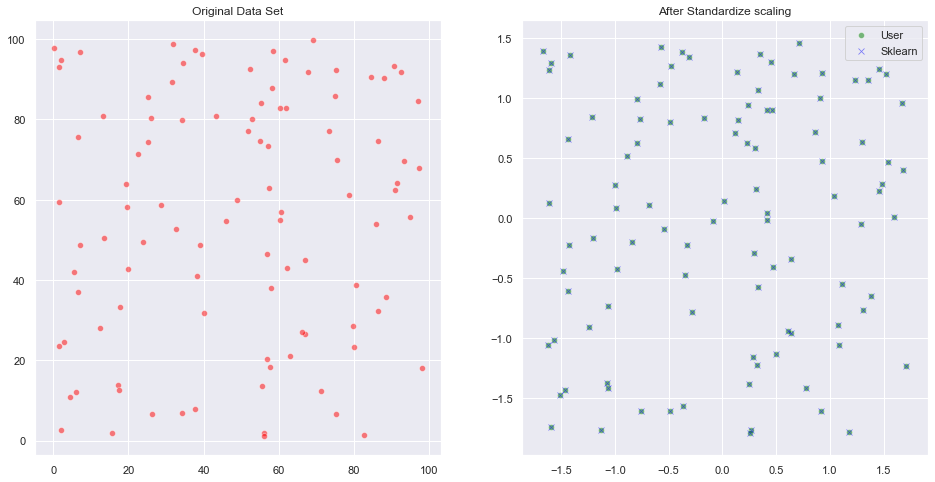

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 8))
sns.set()
sns.scatterplot(X_2D[:, 0], X_2D[:, 1], ax=ax1, color='red', alpha=0.5)
sns.scatterplot(X_2D_std[:, 0], X_2D_std[:, 1], ax=ax2, color='green', label='User', alpha=0.5)
sns.scatterplot(X_2D_std_sk[:, 0], X_2D_std_sk[:, 1], ax=ax2, color='blue', marker='x', label='Sklearn', alpha=0.5)
ax1.set_title('Original Data Set')
ax2.set_title('After Standardize scaling')
ax2.legend()

## Application for Wine dataset

In [19]:
df_train = pd.read_csv('data/wine_train.csv')
df_test = pd.read_csv('data/wine_test.csv')

In [20]:
# First few rows
df_train.head()

,label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
1,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
2,1,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
3,2,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
4,1,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035


In [21]:
df_test.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
1,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
2,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
3,11.84,2.89,2.23,18.0,112,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500
4,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480


Extract the interested features to demonstate the concept of this notebook

In [22]:
# Consider only 'Malic acid' and 'Proline' features
df_train_2 = df_train[['Malic acid','Proline']]
df_test_2 = df_test[['Malic acid','Proline']]

# <font color=red> Without feature normalization</font>

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
X_train = df_train_2.values
y_train = df_train[['label']].values
X_test = df_test_2.values

In [36]:
y_train.shape
# 2D array 119x1

(119, 1)

In [37]:
y_train_1D = y_train.ravel()

In [40]:
y_train_1D.shape
# Vector with 119 components

(119,)

In [25]:
logreg = LogisticRegression(penalty='none', solver='saga', max_iter = 10000)
# Default: we use OvR (Ove vs Rest)
logreg.fit(X_train, y_train.ravel())
# ravel(): convert 2D to 1D

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
logreg.coef_

array([[-0.25145058,  0.00087554],
       [ 0.02853414, -0.00120626],
       [ 0.14747371, -0.00226833]])

In [48]:
# This dataset has 3 labels: {1, 2, 3}
logreg.coef_[0, :] # Coeffs for model with label '1' and label 'not 1' (anything not 1 becomes 0, same for 2 and 3)

array([-0.25145058,  0.00087554])

In [46]:
logreg.coef_[1, :] # Coeffs for model with label '2' and label 'not 2' 

array([ 0.02853414, -0.00120626])

In [47]:
logreg.coef_[2, :] # Coeffs for model with label '3' and label 'not 3'

array([ 0.14747371, -0.00226833])

In [49]:
logreg.intercept_

array([-0.10282372,  0.06688726, -0.00321965])

In [50]:
y_prob = logreg.predict_proba(X_test)
# predict_proba = value of predictor

In [51]:
y_prob

array([[0.35640244, 0.34920805, 0.29438952],
       [0.51219414, 0.30240487, 0.18540099],
       [0.24341802, 0.37399435, 0.38258763],
       [0.35973464, 0.34650226, 0.29376311],
       [0.40147059, 0.33458077, 0.26394864],
       [0.46338993, 0.31816795, 0.21844211],
       [0.53541174, 0.29712567, 0.16746259],
       [0.35476735, 0.35297863, 0.29225402],
       [0.39654045, 0.3404014 , 0.26305815],
       [0.29017674, 0.3590032 , 0.35082006],
       [0.48818952, 0.31024629, 0.20156419],
       [0.48774142, 0.31215209, 0.20010649],
       [0.41046048, 0.33458495, 0.25495457],
       [0.7034032 , 0.21961627, 0.07698053],
       [0.78254322, 0.17290539, 0.04455138],
       [0.37776726, 0.34005778, 0.28217496],
       [0.49114939, 0.30913946, 0.19971114],
       [0.244652  , 0.37045611, 0.38489189],
       [0.6425388 , 0.25037013, 0.10709107],
       [0.44042747, 0.3245239 , 0.23504863],
       [0.39090198, 0.33981745, 0.26928057],
       [0.32339689, 0.35888596, 0.31771715],
       [0.

In [26]:
y_pred = logreg.predict(X_test)

In [52]:
y_pred

array([1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1])

### <font color='blue'>Calculate accuracy score </color>

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_real = pd.read_csv('data/wine_test_labels.csv').values

In [89]:
print("\nPerformance without feature normalization:", accuracy_score(y_pred, y_real))


Performance without feature normalization: 0.3389830508474576


# <font color='red'>With feature normalization </color>

## <font color='blue'>Using MinMaxScaler </color>

In [67]:
from sklearn import preprocessing

In [68]:
minmax_scaler = preprocessing.MinMaxScaler()
minmax_scaler.fit(X_train) # Learn min, max values in X_trian
X_train_minmax = minmax_scaler.transform(X_train)
# Do similar scalling for test features
# Have to reuse the "minmax scaler" model for training data to scale the test features
X_test_minmax = minmax_scaler.transform(X_test)

In [69]:
X_train_minmax[:5]

array([[0.15019763, 0.71825963],
       [0.36561265, 0.32596291],
       [0.46640316, 0.40442225],
       [0.19565217, 0.2810271 ],
       [0.18577075, 0.53994294]])

In [70]:
logreg2 = LogisticRegression(penalty = 'none', solver = 'saga', max_iter= 10000)
logreg2.fit(X_train_minmax, y_train.ravel())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_pred_minmax = logreg2.predict(X_test_minmax)
print("\nPerformance with feature normalization via min/max scaling:", accuracy_score(y_pred_minmax, y_real))


Performance with feature normalization via min/max scaling: 0.7288135593220338


## <font color=blue> Using StandardScaler</font>

In [72]:
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(X_train)
# std_scaler will find the mean and std of X_2D numpy array
X_train_std = std_scaler.transform(X_train)
# do not do:
    # std_scaler.fit(X_test), will give incorrect scaling
X_test_std = std_scaler.transform(X_test)

In [79]:
logreg3 = LogisticRegression(penalty = 'none', solver = 'saga', max_iter= 10000)
logreg3.fit(X_train_std, y_train.ravel())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
y_pred_std = logreg3.predict(X_test_std)
print("\nPerformance with feature normalization via Z-score scaling:", accuracy_score(y_pred_std, y_real))


Performance with feature normalization via Z-score scaling: 0.7288135593220338


In [94]:
accuracy_score(y_pred_std, y_pred_minmax)

1.0